In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [4]:
from sklearn.datasets import fetch_california_housing
ca_housing = fetch_california_housing()
print ca_housing.DESCR

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.




In [6]:
print ca_housing.feature_names

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [9]:
print ca_housing.target

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [58]:
df = pd.DataFrame(ca_housing.data, columns=ca_housing.feature_names)
df['Value'] = ca_housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [36]:
corr_matrix = df.corr()


pandas.core.series.Series

In [37]:
corr_with_value = corr_matrix['Value']

In [41]:
corr_with_value.sort_values(ascending=False)

Value         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: Value, dtype: float64

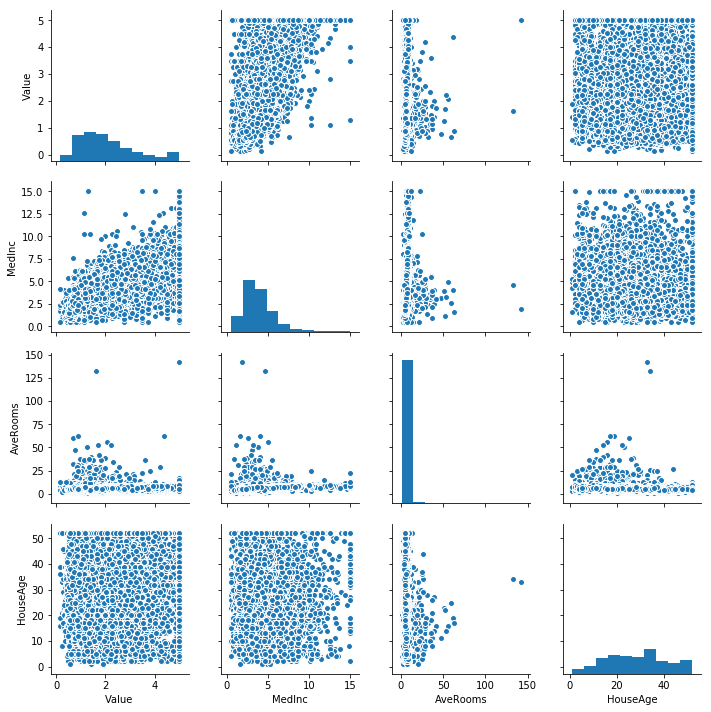

In [46]:
sns.pairplot(df[['Value', 'MedInc', 'AveRooms', 'HouseAge']])

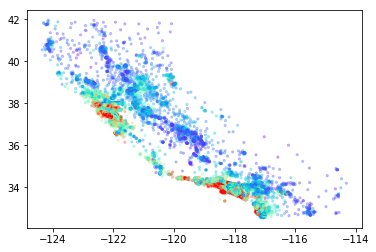

In [57]:
plt.scatter(df['Longitude'], df['Latitude'],  alpha=0.3, c=df['Value'], cmap='rainbow', s=5)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1])

In [77]:
x_train.shape, y_train.shape

((15480, 8), (15480,))

In [78]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
y_predict = model.predict(x_test)
print y_test.shape, y_predict.shape

(5160,) (5160,)


In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse


0.6971255786961165

In [97]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, df.iloc[:, :-1], df.iloc[:, -1], cv=10)
scores.mean()

0.5110068610524551

In [ ]:
model.fit()